# Module 8 - Final Project 


**In this final project, you will demonstrate what you have learned in this class by applying a thorough data analysis to a data set of your choice.** 

As discussed on the discussion boards in the last two weeks, your data set should contain rich enough features and a good sample size so that you can apply the methods you have learned to derive some **insights** from the data. The ultimate goal of data analysis is to learn from the data so that we can form useful and actionable knowledge. 

**Predictive models are only useful if you can interpret the data, find out influential variables, derive insights that are useful and actionable for your audience!**

---

Use this notebook for the analysis of your final project. **Your deliverables for the final project are:** 

- **This notebook**: contains the **full** data science project life cycle as you have learned in the Intro class. 
 
   - Load your data, clean your data, include all the carpentry you need to put it into some shape for your later analysis. 
            
  - EDA: exploratory data analysis: this is where you do the univariate and multivariate analyses; visualize your data to understand the shape and associations in it. Plot densities, histograms, scatter plots, etc. Look for correlations, patterns, clusters, etc.     
   
  - Modeling and hypothesis testing: use any of the adequate techniques to see if you can model the influence of the variables on each other. You can try to reduce dimensionality, try to do regression analysis, hypothesis testing, etc. to see how variables affect each other.    
   
  - **Insights:** the point of data analysis to derive **insights** from your data. What do you see? What did you learn from the data? Did it answer your initial question or did it verify your hypothesis? 
   
   
- **A PDF file** that contains a **few** slides to summarize your results: similar to the data vis course, create a pdf document that contains up to 4-5 slides (**no more**) to present your results. Make sure to put the pdf file **in the `exercises` folder of module 8**. Communicate your results effectively using visualization principles you have learned and provide useful and actionable insights for your audience. 
 
 
 
- Upload your data set to this folder (under exercises folder). 
 
 ---
 
 
 **You should have ample explanation and comments for all your data analysis in this notebook.** Think of it as a LAB notebook: imagine that you are creating a lab notebook for others to follow and learn from your analysis. You should have enough details so that somebody can recreate your analysis by following your descriptions and explanations. 
 
Have a markdown cell before each code cell explaining **what** you are doing and **why** you are doing it. Have comments in the code cell. Have a markdown cell **after** every code cell explaining what you just found out by running that code cell before. 
 
 ---
 
 

## 1. Loading, Cleaning, Displaying Data 

Explain your data set here; 

 - what is it about? 
 
 - What are the variables? 
 
 - What do you want to do with it? (your research questions or hypotheses if you have any) 
 
 - How are you going to clean it? etc. 


I wanted to take a look at crime data in Columbia Missouri. 

There are many variables, but I am dropping a ~100 of them to reduce scope. 
There is demographic, location, time, and search information. 


Some hypothesizes to test. Are stops uniform on time and day and month? Are the proportion of stops that result in search uniform on time and day? There are so many questions to ask of this data. I think this data is perfect for this type of project.

Ultimatly, I want to use multi logistic regerssion to try and predict the search information given the other information.

I to be honest, this data is really clean. I am going to re-map some of the data and drop unecessary columns. 

In [1]:
# load your data, 
library(dplyr)
library(ggplot2)
library(caret)
library(randomForest)
library(car)
library(pROC)


set.seed(999)


df <- read.csv("CPD_vehicle_stop_data_2023.csv",
              header = TRUE, stringsAsFactors = FALSE)
dim(df)

#we need to drop unecessary columns.
#There are a lot of extra columns, luckily they are grouped together so I can do this!
df2 <- df[,-c(12:103)]

dim(df2)
print("Drop 92 columns to reduce scope of work")

#There are some blanks in the srch)initated, but if you look at search diration we can assume they are N
df2$srch_initiated <-trimws(df2$srch_initiated)

df2$srch_initiated[df2$srch_initiated==""] <- "N"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




[1] 3950  107

[1] 3950   15

[1] "Drop 92 columns to reduce scope of work"


In [2]:
# show the data carpentry, cleaning, formatting (long vs wide) 
df2$race           <- as.factor(df2$race)
df2$resident       <- as.factor(df2$resident)
df2$sex            <- as.factor(df2$sex)
df2$age            <- as.factor(df2$age) 
df2$Location       <- as.factor(df2$Location)
df2$srch_initiated <- as.factor(df2$srch_initiated)
df2$DoW            <- as.factor(df2$DoW)
df2$day_night      <- as.factor(df2$day_night)
df2$month          <- as.factor(df2$month)

#Make search binary
df2$searches <- ifelse(df2$srch_initiated == "Y", 1, 0)

#Order my factors
df2$month <- factor(df2$month, levels = c("January", "February", "March", "April", "May", "June",
                               "July", "August", "September", "October", "November", "December"), ordered = TRUE)

df2$age <- factor(df2$age, levels = c("Under 18","18-29", "30-39","40-64","65+"), ordered = TRUE)

df2$DoW <- factor(df2$DoW,levels = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"), ordered = TRUE)

colSums(is.na(df2)) # No NA, Very clean data
levels(df2$srch_initiated)

cadcallid          street        stoptime            beat            race 
              0               0               0               0               0 
       resident             sex             age        Location  srch_initiated 
              0               0               0               0               0 
search_duration       hour_stop             DoW       day_night           month 
              0               0               0               0               0 
       searches 
              0

[1] "N" "Y"

In [3]:
#Here is how I ordered the factors. 
unique(df2$age)

[1] 18-29    30-39    40-64    65+      Under 18
Levels: Under 18 < 18-29 < 30-39 < 40-64 < 65+

## 2. Exploratory Data Analysis 

Have your **multiple** code and markdown cells here to explore the data. 

 - descriptive statistics 
 - univariate, multivariate, 
 - histograms, correlations, associations, scatter plots
 - do correlations hold for subgroups??? (Simpson's paradox) 
 - are there any meaningful clusters? 
 - linearity checks, etc. 


In [4]:
str(df2)
head(df2)
summary(df2)

'data.frame':	3950 obs. of  16 variables:
 $ cadcallid      : chr  "2023000873" "2023000998" "2023001895" "2023002114" ...
 $ street         : chr  "3850 RANGE LINE ST" "PARIS RD/VANDIVER DR" "E BROADWAY/N OLD 63" "2102 PARIS RD" ...
 $ stoptime       : chr  "2023-01-02 08:35:00.000" "2023-01-02 11:53:00.000" "2023-01-03 13:16:00.000" "2023-01-03 17:20:00.000" ...
 $ beat           : chr  "30S " "40W " "80N " "40W " ...
 $ race           : Factor w/ 6 levels "A ","B ","H ",..: 2 6 6 2 2 2 6 6 2 6 ...
 $ resident       : Factor w/ 2 levels "N   ","Y   ": 2 2 2 2 2 2 2 1 2 1 ...
 $ sex            : Factor w/ 2 levels "F","M": 2 2 1 2 2 2 1 1 2 2 ...
 $ age            : Ord.factor w/ 5 levels "Under 18"<"18-29"<..: 2 2 2 3 3 3 3 3 2 4 ...
 $ Location       : Factor w/ 6 levels "City Street",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ srch_initiated : Factor w/ 2 levels "N","Y": 1 1 1 1 2 1 1 1 1 1 ...
 $ search_duration: chr  "NULL" "NULL" "NULL" "NULL" ...
 $ hour_stop      : int  8 11 13 17 7 16 16 

,cadcallid,street,stoptime,beat,race,resident,sex,age,Location,srch_initiated,search_duration,hour_stop,DoW,day_night,month,searches
,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<ord>,<fct>,<fct>,<chr>,<int>,<ord>,<fct>,<ord>,<dbl>
1,2023000873,3850 RANGE LINE ST,2023-01-02 08:35:00.000,30S,B,Y,M,18-29,City Street,N,NULL,8,Mon,day,January,0
2,2023000998,PARIS RD/VANDIVER DR,2023-01-02 11:53:00.000,40W,W,Y,M,18-29,City Street,N,NULL,11,Mon,day,January,0
3,2023001895,E BROADWAY/N OLD 63,2023-01-03 13:16:00.000,80N,W,Y,F,18-29,City Street,N,NULL,13,Tue,day,January,0
4,2023002114,2102 PARIS RD,2023-01-03 17:20:00.000,40W,B,Y,M,30-39,City Street,N,NULL,17,Tue,day,January,0
5,2023000201,W WORLEY ST/N WEST BLVD,2023-01-01 07:03:00.000,20W,B,Y,M,30-39,City Street,Y,0-15 MINUTES,7,Sun,day,January,1
6,2023000518,E NORTH CEDAR LAKE DR/JOHN GARRY DR,2023-01-01 16:22:00.000,60W,B,Y,M,30-39,City Street,N,NULL,16,Sun,day,January,0


  cadcallid            street            stoptime             beat          
 Length:3950        Length:3950        Length:3950        Length:3950       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 race      resident    sex            age                     Location   
 A :  88   N   : 983   F:1565   Under 18: 149   City Street       :3242  
 B :1443   Y   :2967   M:2385   18-29   :1623   County Road       :   9  
 H : 114                        30-39   : 854   Interstate Highway: 125  
 I :  19                        40-64   :1105   Other             :  30  
 O :  37      

I called str() head() and summary() to understand the data. 

In str() we can see which columns are factors. I purposly made hour_stop a variable because I feel like this is more ordered than the rest of them. we can see the median hour_stop is in the 15th hour.

These tables are interesting. For example there are far more male stops than female stops. I will visualize some of these tables below. 

The DOW shows there were more stops on saturday than other days.

`summarise()` has grouped output by 'hour_stop'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'DoW'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



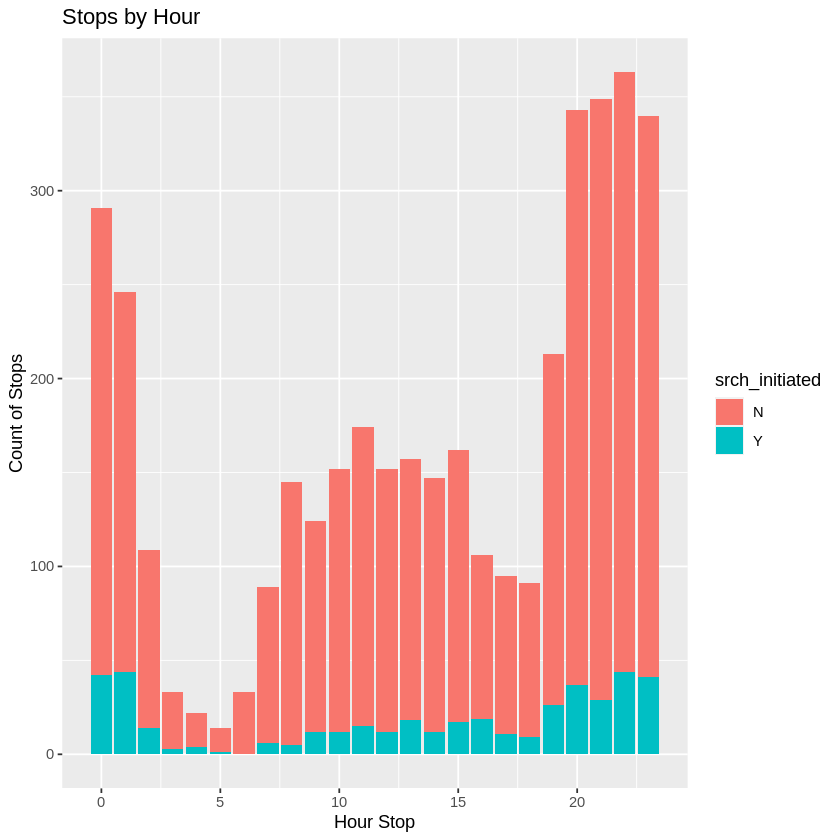

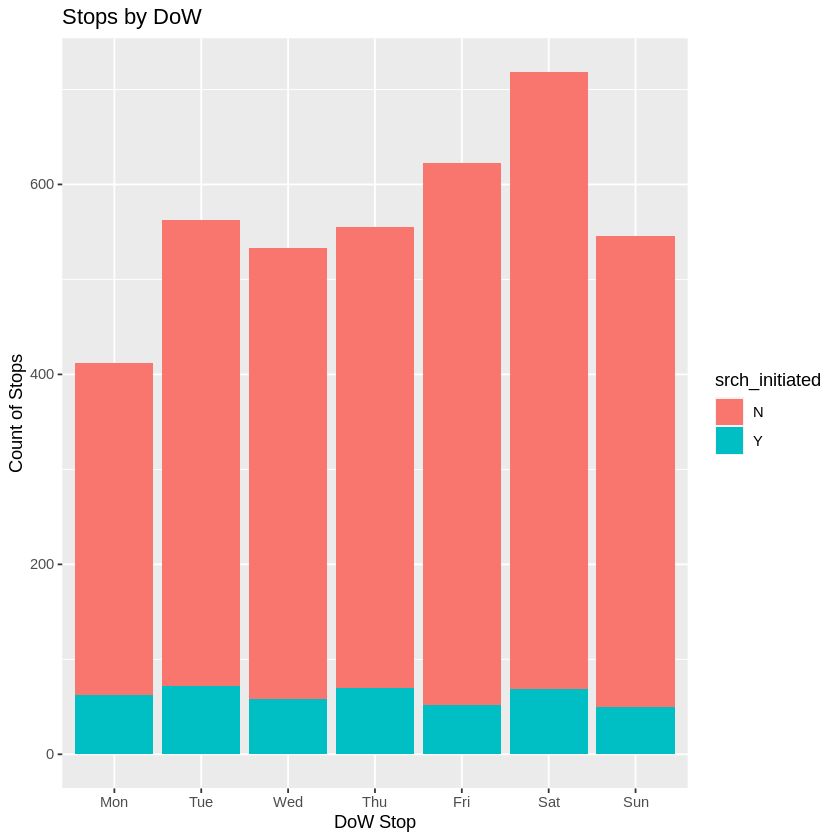

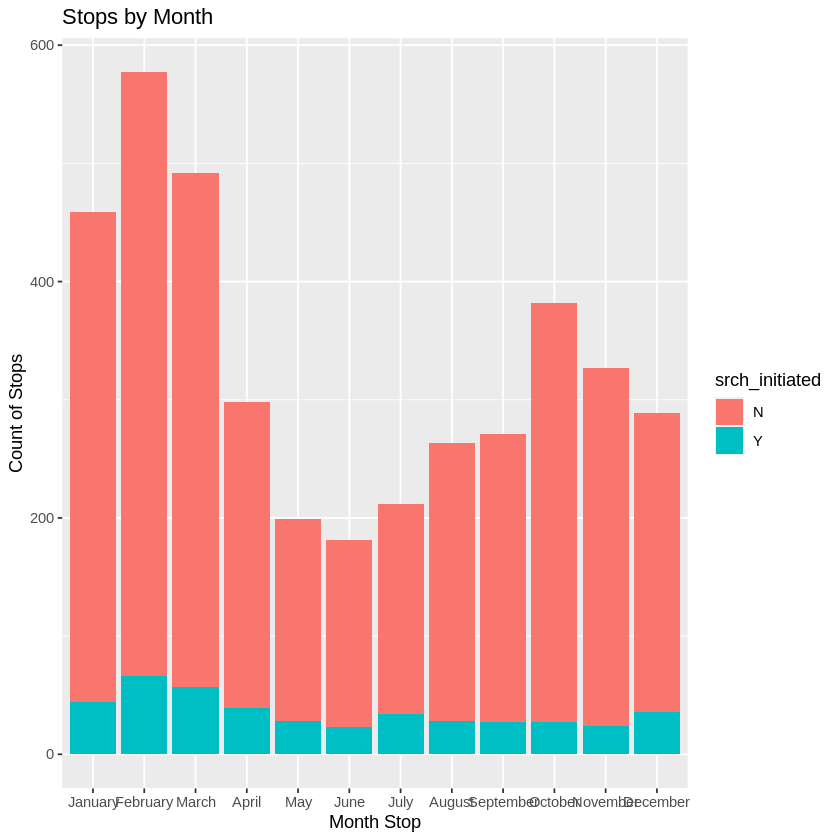

In [5]:
# codes and comments 
freq_by_hour <- df2 %>%
  group_by(hour_stop,srch_initiated) %>%
  summarise(stop_count = n())

freq_by_DoW <- df2 %>%
  group_by(DoW,srch_initiated) %>%
  summarise(stop_count = n())

freq_by_month <- df2 %>%
  group_by(month,srch_initiated) %>%
  summarise(stop_count = n())

ggplot(freq_by_hour, aes(x = hour_stop, y = stop_count,fill=srch_initiated)) +
  geom_col() +
  labs(title = "Stops by Hour",
       x = "Hour Stop",
       y = "Count of Stops")

ggplot(freq_by_DoW, aes(x = DoW, y = stop_count,fill=srch_initiated)) +
  geom_col() +
  labs(title = "Stops by DoW",
       x = "DoW Stop",
       y = "Count of Stops")

ggplot(freq_by_month, aes(x = month, y = stop_count,fill=srch_initiated)) +
  geom_col() +
  labs(title = "Stops by Month",
       x = "Month Stop",
       y = "Count of Stops")



Hour: while this plot looks three humped, we have to remember that 24=0 on a clock, so there are really two times where most cars are pulled over, 11 PM and 11 AM. Watch out if you are driving at this time!

DoW : This trend is a lot smoother, however we can see that saturday and friday are the highest while monday is the lowest. If I were a cop, I wouldnt want to work on a monday either lol. (please dont dock my grade)

Month: This trend actually shows a lot of variance that I wanst expecting. Jan Feb and March (1st quarter) all have a lot of trafic stops. I wonder why?... training...incentive...?


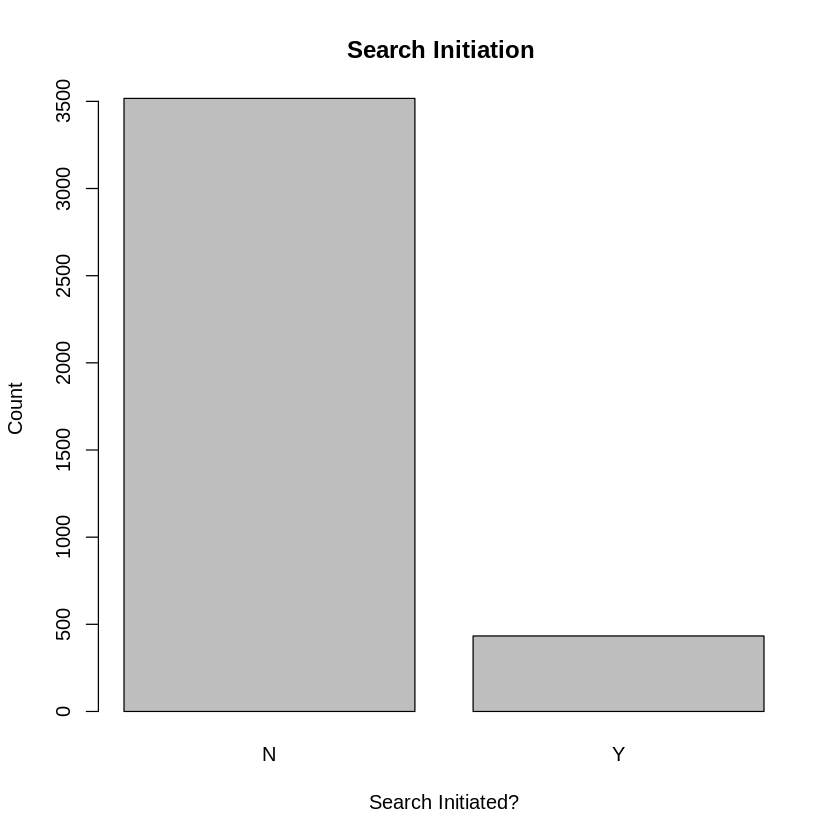

In [6]:
srch_tab <- table(df2$srch_initiated)
barplot(srch_tab, main = "Search Initiation ", xlab = "Search Initiated?", ylab = "Count")

A Vast majority of stops are not searched. 

`summarise()` has grouped output by 'Location'. You can override using the `.groups` argument.



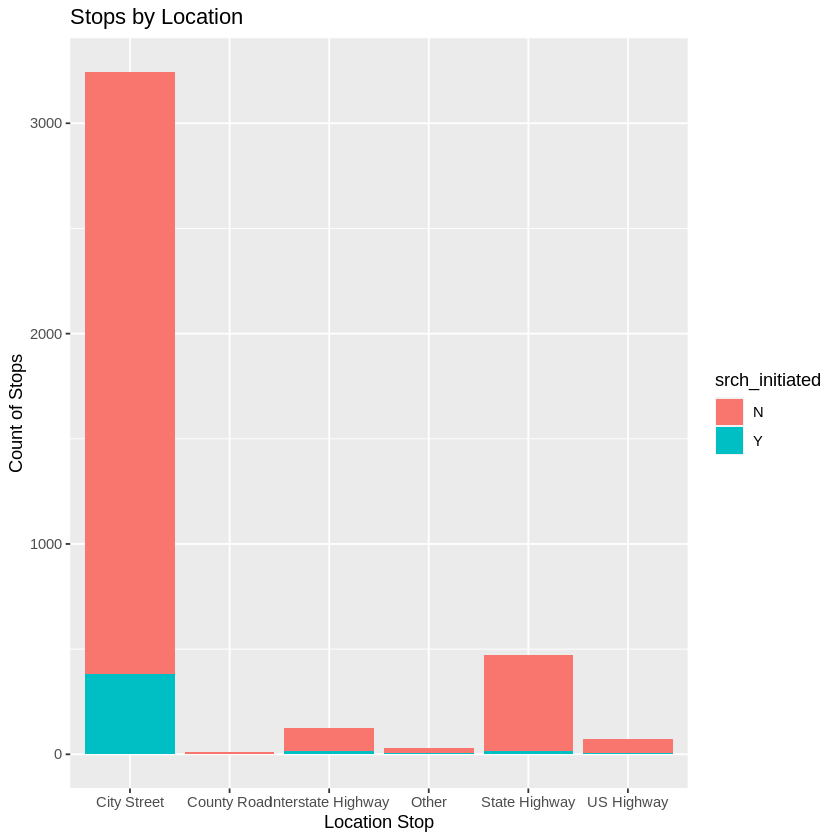

In [7]:
freq_by_location <- df2 %>%
  group_by(Location,srch_initiated) %>%
  summarise(stop_count = n())

ggplot(freq_by_location, aes(x = Location, y = stop_count,fill=srch_initiated)) +
  geom_col() +
  labs(title = "Stops by Location",
       x = "Location Stop",
       y = "Count of Stops")


A vast majority of stops by location is in city streets, and it looks like the highest chance of being searched is also on a city street. 

Drive slow on a city street. 

`summarise()` has grouped output by 'race'. You can override using the `.groups` argument.



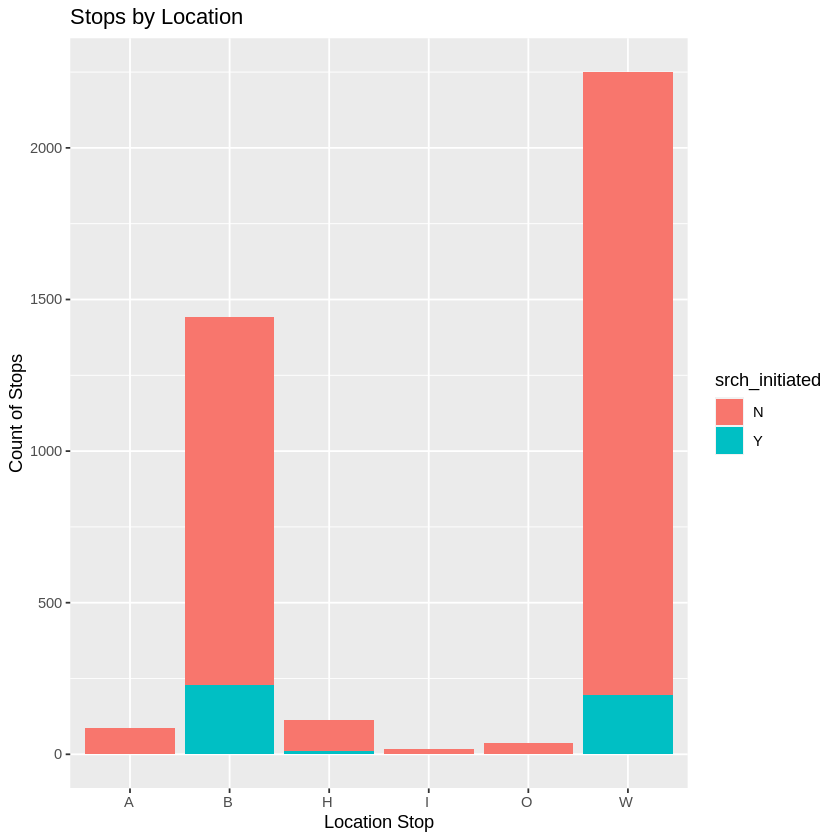

In [8]:
freq_by_race <- df2 %>%
  group_by(race,srch_initiated) %>%
  summarise(stop_count = n())

ggplot(freq_by_race, aes(x = race, y = stop_count,fill=srch_initiated)) +
  geom_col() +
  labs(title = "Stops by Location",
       x = "Location Stop",
       y = "Count of Stops")

This graph may be misleading because this does not take into acountthe population of columbia. While columbia has 92k people who are white, columbia only has 14k people who are black. This percentage is imporant to consider.

Im learning that I do not like the data how it is currenlty laid out.

In [9]:
df3 <- df2 %>%
  group_by(race, resident, sex, age, day_night) %>%
  summarize(
    cnt = n(),
    searches = sum(srch_initiated == 'Y'),
    p_srch = searches/cnt  # fraction with search initiated
  ) %>% 
  arrange(desc(cnt))

df4 <- subset(df3, cnt> 7)
head(df4)
dim(df4)
summary(df4)
colnames(df4)

`summarise()` has grouped output by 'race', 'resident', 'sex', 'age'. You can override using the `.groups` argument.



race,resident,sex,age,day_night,cnt,searches,p_srch
<fct>,<fct>,<fct>,<ord>,<fct>,<int>,<int>,<dbl>
W,Y,M,18-29,night,237,16,0.06751055
B,Y,M,18-29,night,225,38,0.16888889
W,Y,F,18-29,night,165,9,0.05454545
W,Y,M,40-64,night,140,30,0.21428571
B,Y,F,18-29,night,125,12,0.09600000
B,Y,M,40-64,night,122,27,0.22131148


[1] 70  8

 race    resident  sex          age     day_night       cnt        
 A : 3   N   :29   F:31   Under 18: 7   day  :29   Min.   :  8.00  
 B :27   Y   :41   M:39   18-29   :19   night:41   1st Qu.: 15.00  
 H : 4                    30-39   :18              Median : 35.00  
 I : 0                    40-64   :17              Mean   : 53.21  
 O : 0                    65+     : 9              3rd Qu.: 73.25  
 W :36                                             Max.   :237.00  
    searches          p_srch       
 Min.   : 0.000   Min.   :0.00000  
 1st Qu.: 1.000   1st Qu.:0.04659  
 Median : 3.000   Median :0.07407  
 Mean   : 6.071   Mean   :0.10024  
 3rd Qu.: 7.750   3rd Qu.:0.15288  
 Max.   :38.000   Max.   :0.36364  

[1] "race"      "resident"  "sex"       "age"       "day_night" "cnt"      
[7] "searches"  "p_srch"

I am going to make a frequency table with race,resident,sex,age,cnt, searches, and p_search. 
I am going to subset this df to only include counts > 7.
This way, I can see which factors of Race, Resident, sex, age, and day_night. I chose these columns becaususe I wanted to keep a suffiencent row count as I balence the exponential grown of stacking group_bys, with the filter condition I set in place. 

This is a very cool way to look at the data in my opinion. 

## 3. Feature Engineering 

 - Any PCA, FA, feature selection, feature ranking, etc. 
 
 - Rank features by things like random forest feature importance, regression p-values, etc. 
 
 

In [10]:
#One hot encode these categorical variables. 
df_encoded <- model.matrix(~ race + resident + sex + age + day_night - 1, data = df2)

#Combine with the numerical variables hour and srch
df_final <- cbind(df_encoded, df2 %>% select(hour_stop, srch_initiated))

#Normalize
df_final[, c("hour_stop")] <- scale(df_final[, c("hour_stop")])

head(df_final)

,raceA,raceB,raceH,raceI,raceO,raceW,residentY,sexM,age.L,age.Q,age.C,age^4,day_nightnight,hour_stop,srch_initiated
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<fct>
1,0,1,0,0,0,0,1,1,-3.162278e-01,-0.2672612,6.324555e-01,-0.4780914,0,-0.7636621,N
2,0,0,0,0,0,1,1,1,-3.162278e-01,-0.2672612,6.324555e-01,-0.4780914,0,-0.3701417,N
3,0,0,0,0,0,1,1,0,-3.162278e-01,-0.2672612,6.324555e-01,-0.4780914,0,-0.1077947,N
4,0,1,0,0,0,0,1,1,-3.510833e-17,-0.5345225,1.755417e-16,0.7171372,0,0.4168992,N
5,0,1,0,0,0,0,1,1,-3.510833e-17,-0.5345225,1.755417e-16,0.7171372,0,-0.8948356,Y
6,0,1,0,0,0,0,1,1,-3.510833e-17,-0.5345225,1.755417e-16,0.7171372,0,0.2857257,N


We are kinda doing more data carpentrey, but this time we are one-hot encoding so we can perform PCA

    PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9    PC10 
0.14718 0.11715 0.08741 0.08521 0.07848 0.07509 0.07215 0.07181 0.06950 0.06594 
   PC11    PC12    PC13    PC14 
0.05677 0.05197 0.02133 0.00000 


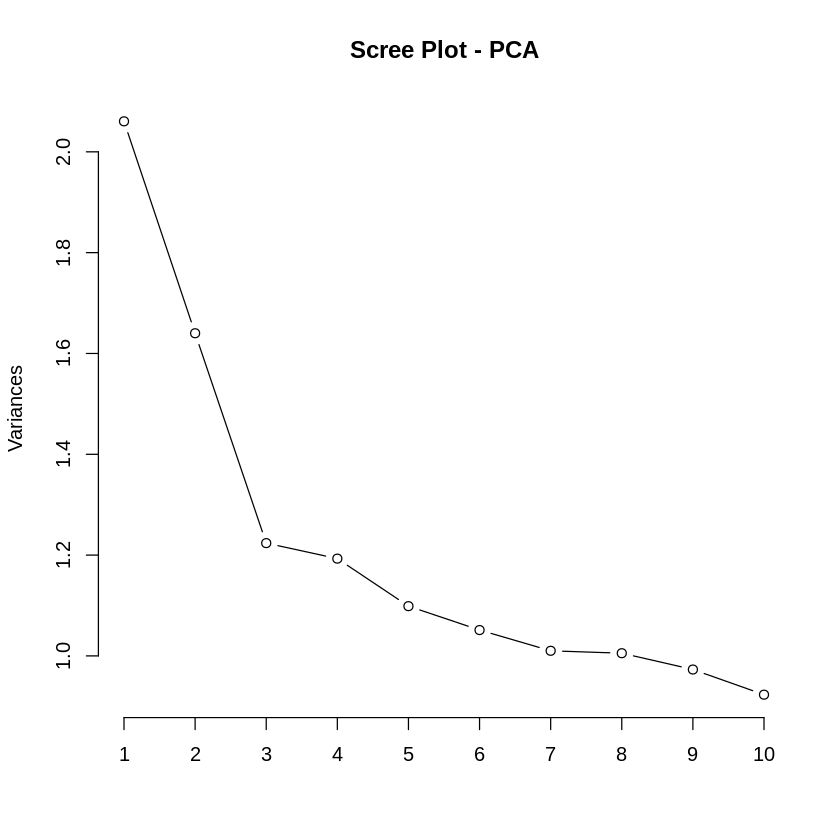

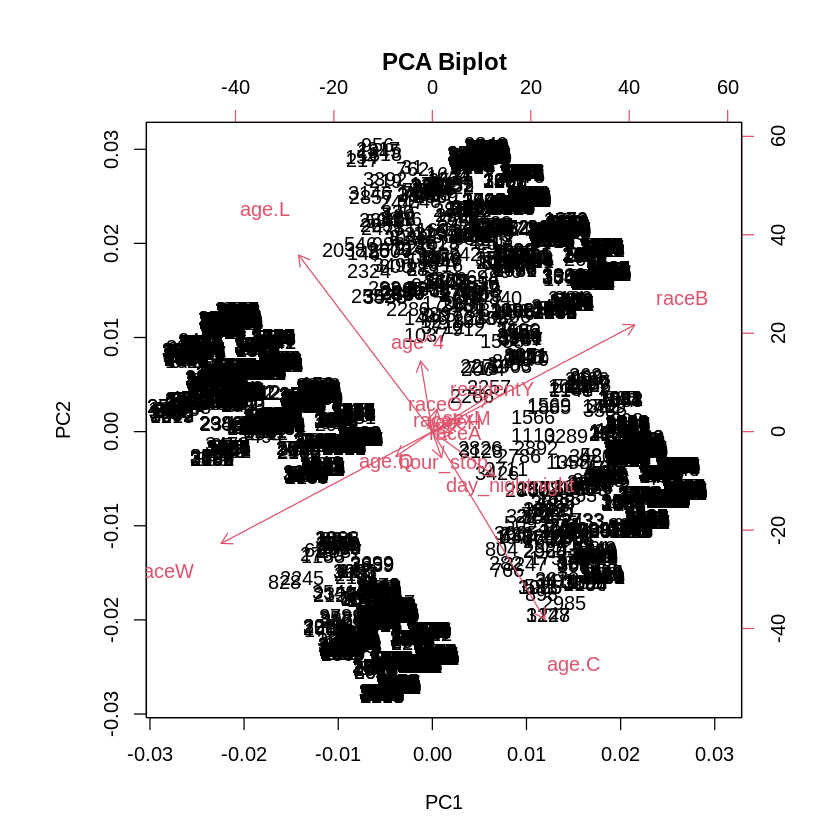

In [12]:
pca_model <- prcomp(df_final[, -ncol(df_final)], scale. = TRUE)
screeplot(pca_model, type = "lines", main = "Scree Plot - PCA")
explained_variance <- summary(pca_model)$importance[2, ]
print(explained_variance)

# Biplot for PCA interpretation
biplot(pca_model, main = "PCA Biplot")



This is actually pretty cool because this dataset does not really follow the pireto distribution as much as I thought it would. It takes 5 princible components to only explain 50% of the varience. We need 11 to get over 90%

In [13]:
0.14718 +0.11715+ 0.08741+ 0.08521+ 0.07848

[1] 0.51543

In [16]:

num_components <- which(cumsum(explained_variance) >= 0.90)[1]
num_components

pca_data <- as.data.frame(pca_model$x[, 1:num_components])

pca_data$srch_initiated <- df_final$srch_initiated

train_index <- createDataPartition(pca_data$srch_initiated, p = 0.7, list = FALSE)
train_data <- pca_data[train_index, ]
test_data  <- pca_data[-train_index, ]

PC11 
  11

We are setting up the logistic regression model


Call:
glm(formula = srch_initiated ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8214  -0.5187  -0.4283  -0.3422   2.6874  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.27012    0.07797 -29.116  < 2e-16 ***
PC1          0.16379    0.04380   3.739 0.000185 ***
PC2          0.21286    0.05374   3.961 7.47e-05 ***
PC3         -0.07254    0.06030  -1.203 0.228965    
PC4          0.01271    0.07617   0.167 0.867469    
PC5          0.02573    0.08238   0.312 0.754803    
PC6         -0.42183    0.14363  -2.937 0.003316 ** 
PC7         -0.22907    0.29778  -0.769 0.441751    
PC8         -0.24480    0.27742  -0.882 0.377556    
PC9          0.04557    0.09066   0.503 0.615186    
PC10         0.32213    0.08430   3.821 0.000133 ***
PC11        -0.18912    0.07082  -2.670 0.007579 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial 

Setting levels: control = N, case = Y

Setting direction: controls < cases



Area under the curve: 0.6631

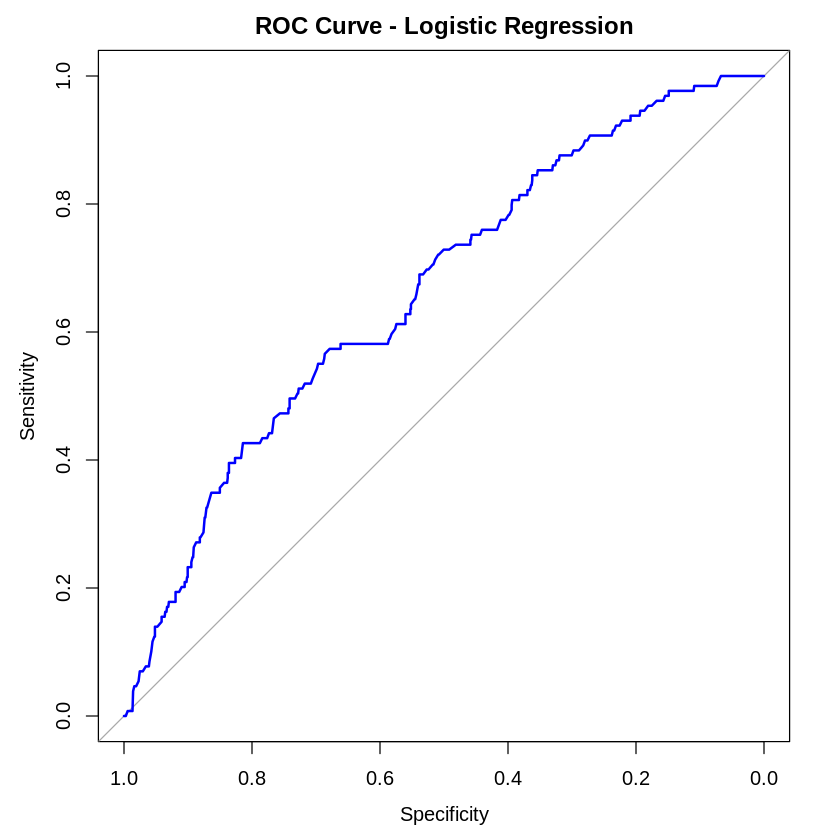

In [17]:
log_model <- glm(srch_initiated ~ ., data = train_data, family = binomial)

# Model Summary
summary(log_model)

# Predictions
pred_probs <- predict(log_model, test_data, type = "response")
pred_labels <- ifelse(pred_probs > 0.5, 1, 0)


# ROC Curve
roc_curve <- roc(test_data$srch_initiated, pred_probs)
plot(roc_curve, col = "blue", main = "ROC Curve - Logistic Regression")
auc(roc_curve)

It looks like PC1,PC2, and PC10 are significant predictors, but the AIC and residual deviance vs null deviance points to the conclusion that this factor reduction technique is not very good. 

## 4. 5. ... The Rest..

Similar to above, have **sections** for every major step in your analysis: hypotheses testing, modeling, running your models (training, testing), finding better parameters for models, **interpreting results**, show evaluation measures such as R^2, AIC, FP, FN, accuracy, MSE, **confusion matrices**, ROC, etc. 



Lets now run PCA, but this time with only the significant components.


Call:
glm(formula = srch_initiated ~ PC1 + PC2 + PC10, family = binomial, 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7351  -0.5243  -0.4342  -0.3585   2.6042  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.18909    0.06615 -33.091  < 2e-16 ***
PC1          0.18728    0.04280   4.376 1.21e-05 ***
PC2          0.24038    0.04887   4.919 8.69e-07 ***
PC10         0.28984    0.07071   4.099 4.15e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1915.8  on 2765  degrees of freedom
Residual deviance: 1853.9  on 2762  degrees of freedom
AIC: 1861.9

Number of Fisher Scoring iterations: 5


Setting levels: control = N, case = Y

Setting direction: controls < cases



Area under the curve: 0.6596

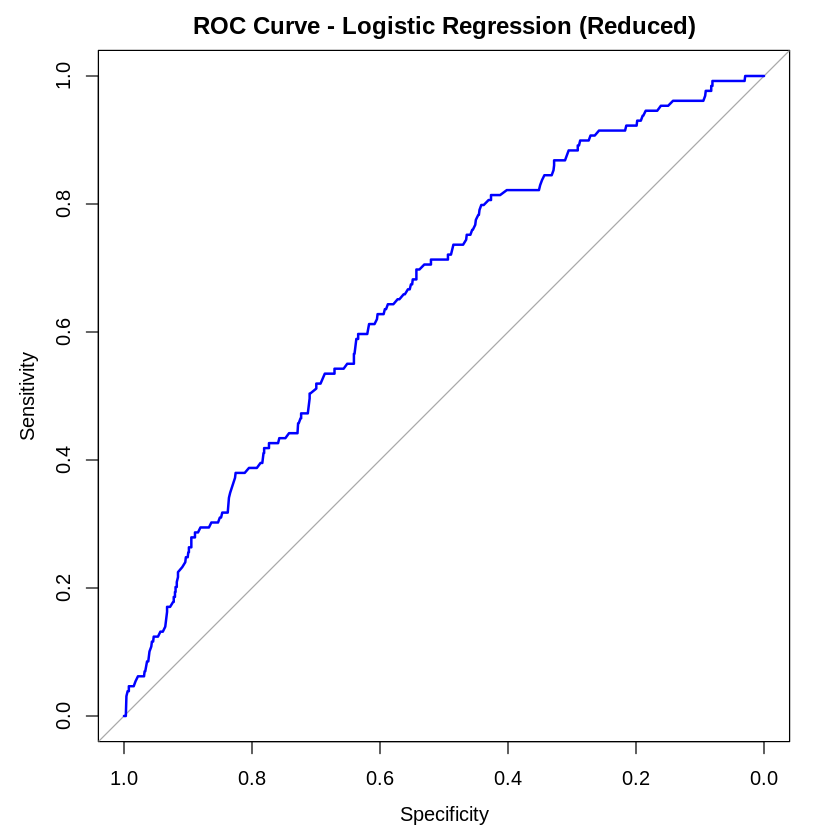

In [18]:
log_model_reduced <- glm(srch_initiated ~ PC1 + PC2 + PC10, 
                         family = binomial, data = train_data)

summary(log_model_reduced)

pred_probs <- predict(log_model_reduced, test_data, type = "response")

pred_labels <- ifelse(pred_probs > 0.5, 1, 0)


roc_curve <- roc(test_data$srch_initiated, pred_probs)
plot(roc_curve, col = "blue", main = "ROC Curve - Logistic Regression (Reduced)")
auc(roc_curve)

This model performs worse than the model with the insignificant predictors. Our residual deviance and our AIC have both increase as compared to the previous model. Although all predictors are still signicifant . 

In [20]:
table(pred_labels)
table(test_data$srch_initiated)
summary(pred_probs)




pred_labels
   0 
1184 


   N    Y 
1055  129 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03346 0.07128 0.09926 0.10840 0.13967 0.23679 

We can see that we are never reaching the threshold of .5, so we are predicting "N" on every instance. Lets rince and repeat with a lower threshold of 0.15. 


Call:
glm(formula = srch_initiated ~ PC1 + PC2 + PC10, family = binomial, 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7351  -0.5243  -0.4342  -0.3585   2.6042  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.18909    0.06615 -33.091  < 2e-16 ***
PC1          0.18728    0.04280   4.376 1.21e-05 ***
PC2          0.24038    0.04887   4.919 8.69e-07 ***
PC10         0.28984    0.07071   4.099 4.15e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1915.8  on 2765  degrees of freedom
Residual deviance: 1853.9  on 2762  degrees of freedom
AIC: 1861.9

Number of Fisher Scoring iterations: 5


Setting levels: control = N, case = Y

Setting direction: controls < cases



Area under the curve: 0.6596

threshold
<dbl>
0.1022742


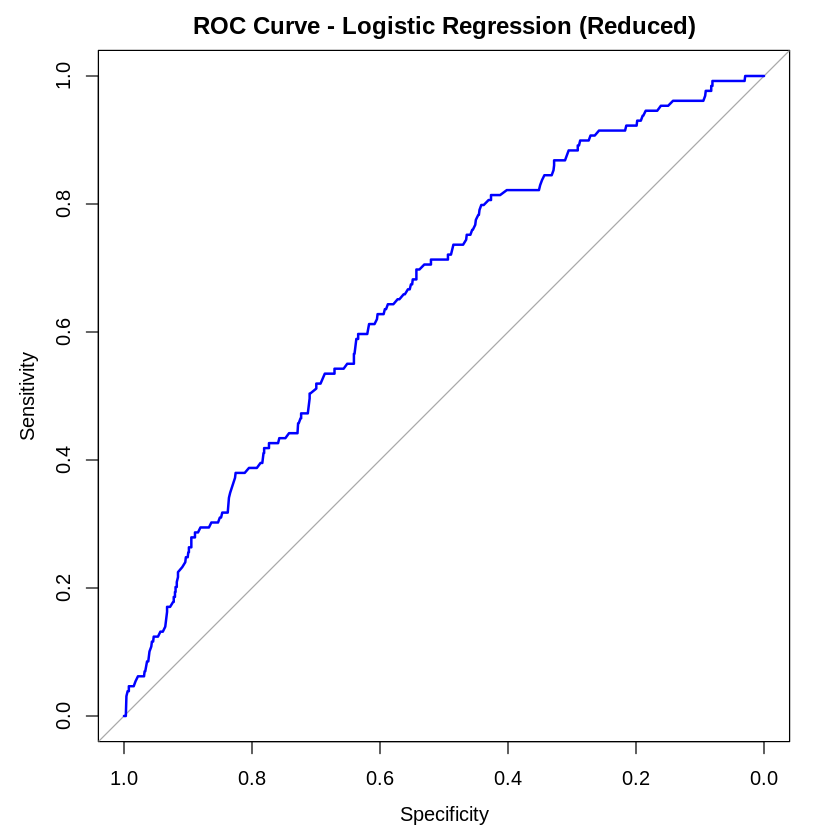

In [21]:
log_model_reduced <- glm(srch_initiated ~ PC1 + PC2 + PC10, 
                         family = binomial, data = train_data)

summary(log_model_reduced)

pred_probs <- predict(log_model_reduced, test_data, type = "response")

pred_labels <- ifelse(pred_probs > 0.15, 1, 0)
pred_labels <- ifelse(pred_labels == 1, "Y", "N") # For some reason I did this bad... This is the worst coding I hav eever done lol 

#ROC/AUC curve default code block
roc_curve <- roc(test_data$srch_initiated, pred_probs)
plot(roc_curve, col = "blue", main = "ROC Curve - Logistic Regression (Reduced)")
auc(roc_curve)
coords(roc_curve, "best", ret = "threshold")

In [22]:
table(pred_labels)
table(test_data$srch_initiated)
summary(pred_probs)


pred_labels
  N   Y 
944 240 


   N    Y 
1055  129 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03346 0.07128 0.09926 0.10840 0.13967 0.23679 

Now we are getting somewhere! We need to find the best threshold, but for this assignment, i will not be doing that. 

In [23]:
pred_labels <- factor(pred_labels, levels = levels(test_data$srch_initiated))

I keep having problems with the factor levels of the srch_initated, so I found this weird code that will remap the factor levels of pred_levels to the levels of test_data$srch_initated. 


In [24]:
# codes and comments 
conf_matrix <- confusionMatrix(pred_labels, test_data$srch_initiated)
conf_matrix
# have a markdown cell after every major step to explain what you did and what you learned. 


Confusion Matrix and Statistics

          Reference
Prediction   N   Y
         N 864  80
         Y 191  49
                                          
               Accuracy : 0.7711          
                 95% CI : (0.7461, 0.7948)
    No Information Rate : 0.891           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1443          
                                          
 Mcnemar's Test P-Value : 2.357e-11       
                                          
            Sensitivity : 0.8190          
            Specificity : 0.3798          
         Pos Pred Value : 0.9153          
         Neg Pred Value : 0.2042          
             Prevalence : 0.8910          
         Detection Rate : 0.7297          
   Detection Prevalence : 0.7973          
      Balanced Accuracy : 0.5994          
                                          
       'Positive' Class : N               
                              

## Rinse and repeat 

Evaluation measures can lead to insights that you can use to redo some of the steps to improve your analysis. Try to interpret the confusion matrices, for example: do FP or FN observations have some things in common? How can you rectify the wrong predictions in training the model? Are there any influential points or outliers that affect the models, etc. 



# Confusion Matrix Eval

My model is not very good.

I have low specificity (.4031) this means that can not classify trafic stops.
I also have low accuracy of 75% compared to the baseline of 1055/1184 = 90% of no search.

To help with the low specificity, I will lower the threshold further. I used the coords() function to find the best threshold of 11


Call:
glm(formula = srch_initiated ~ PC1 + PC2 + PC10, family = binomial, 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7351  -0.5243  -0.4342  -0.3585   2.6042  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.18909    0.06615 -33.091  < 2e-16 ***
PC1          0.18728    0.04280   4.376 1.21e-05 ***
PC2          0.24038    0.04887   4.919 8.69e-07 ***
PC10         0.28984    0.07071   4.099 4.15e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1915.8  on 2765  degrees of freedom
Residual deviance: 1853.9  on 2762  degrees of freedom
AIC: 1861.9

Number of Fisher Scoring iterations: 5


Setting levels: control = N, case = Y

Setting direction: controls < cases



Area under the curve: 0.6596

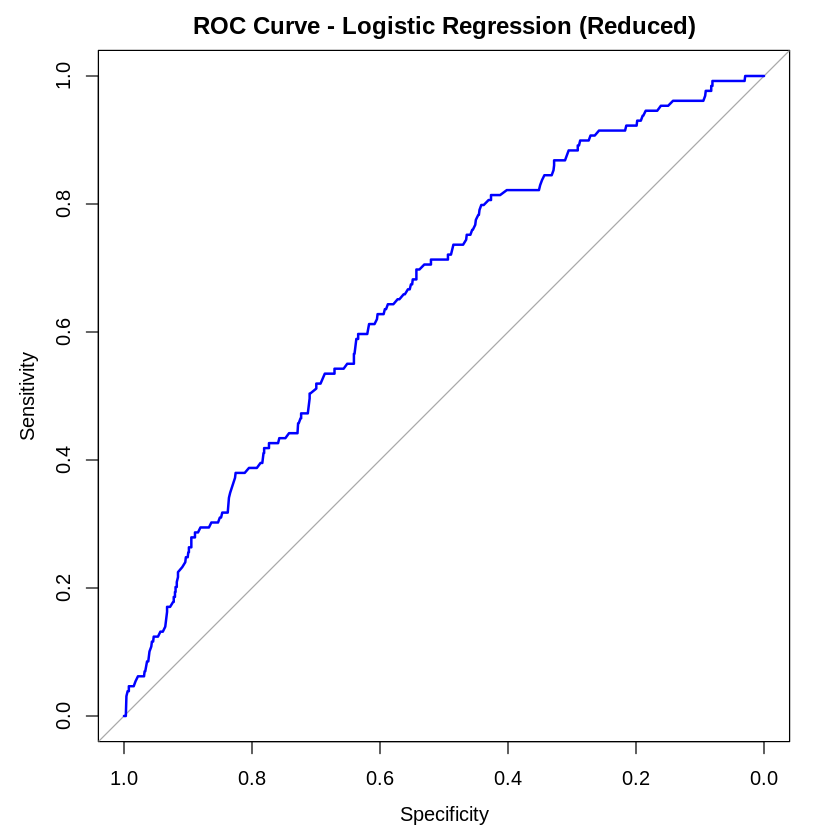

In [25]:
log_model_reduced <- glm(srch_initiated ~ PC1 + PC2 + PC10, 
                         family = binomial, data = train_data)

summary(log_model_reduced)

pred_probs <- predict(log_model_reduced, test_data, type = "response")

pred_labels <- ifelse(pred_probs > 0.11, "Y", "N")

#ROC/AUC curve default code block
roc_curve <- roc(test_data$srch_initiated, pred_probs)
plot(roc_curve, col = "blue", main = "ROC Curve - Logistic Regression (Reduced)")
auc(roc_curve)

In [26]:
pred_labels <- factor(pred_labels, levels = levels(test_data$srch_initiated))

confusionMatrix(pred_labels, test_data$srch_initiated)

Confusion Matrix and Statistics

          Reference
Prediction   N   Y
         N 627  48
         Y 428  81
                                          
               Accuracy : 0.598           
                 95% CI : (0.5694, 0.6261)
    No Information Rate : 0.891           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0969          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.5943          
            Specificity : 0.6279          
         Pos Pred Value : 0.9289          
         Neg Pred Value : 0.1591          
             Prevalence : 0.8910          
         Detection Rate : 0.5296          
   Detection Prevalence : 0.5701          
      Balanced Accuracy : 0.6111          
                                          
       'Positive' Class : N               
                              

This adjustment seems to have hurt the model even more, My accuracy is now 60%. 

My model seems to be insufficient to predict searches from these factors that I have allowed. 

This was a great learning opprotunity to take on a great project.

I am actually proud of myself for this project selection. I have learned that a capstone team also did this project.

I chose this project before I learned that the capstone also is doing this project. 